In [13]:
import helper
import pathlib
import importlib
import ica_module
from nilearn.image import load_img
from nilearn.image import iter_img
from nilearn.image import index_img
from nilearn.image import concat_imgs
from nilearn.plotting import plot_prob_atlas
from nilearn.plotting import plot_stat_map, show

In [16]:
Original_DBMs = load_img("/data/origami/niusha/input/DBM_data.nii")
data = Original_DBMs.get_fdata()

     ======== data type ======== 
 <class 'numpy.memmap'>
      ======== Maximum ========
Overall Maximum: 30.39


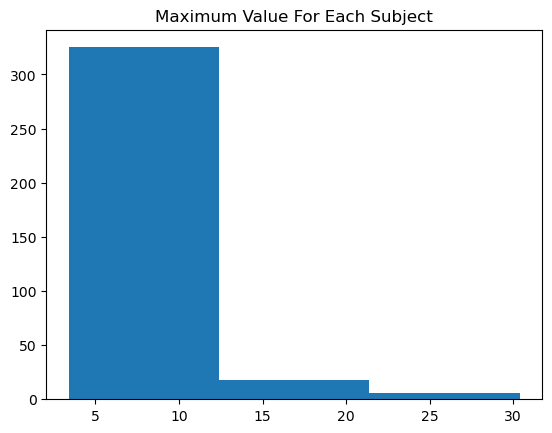

      ======== Mean ========
Overall Mean: -0.00


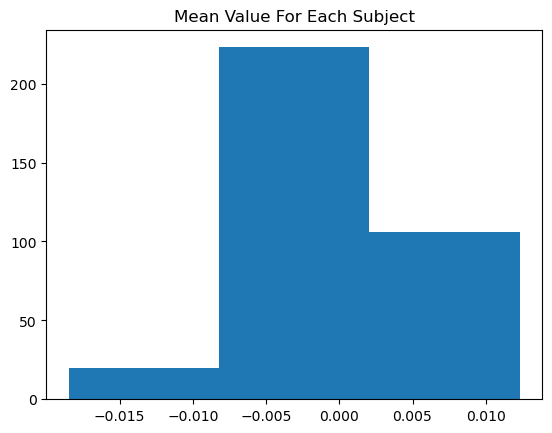

      ======== Minimum ========
Overall Minimum: -11.39


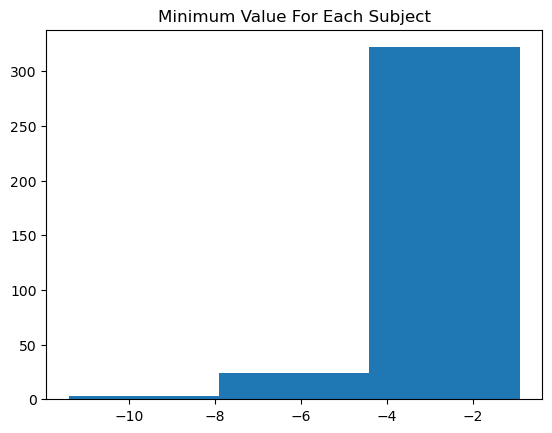

In [17]:
helper.image_report(Original_DBMs)

In [10]:
ICs_whole_original = load_img("/data/origami/niusha/code/local-experiment/io/whole_original_data/ICAs/ICAs_whole_original.nii.gz")

/data/origami/niusha/miniconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize,


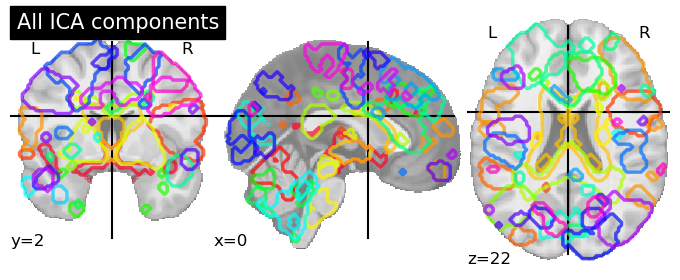

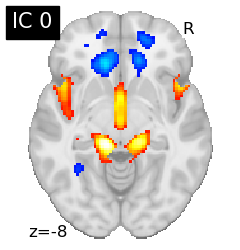

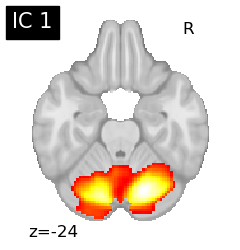

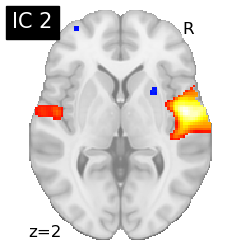

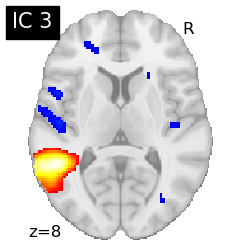

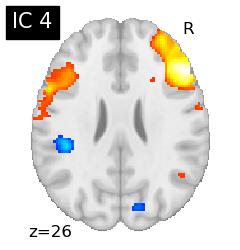

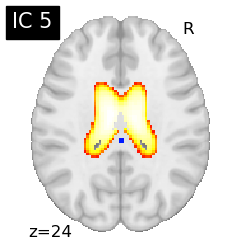

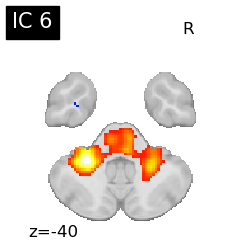

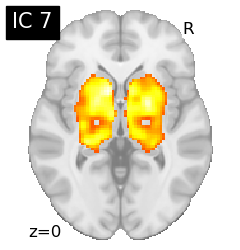

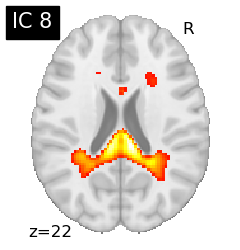

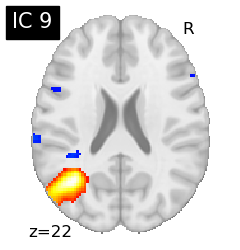

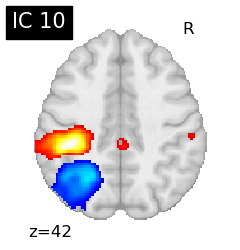

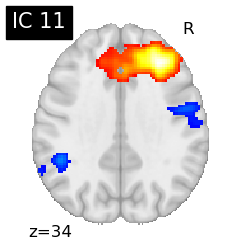

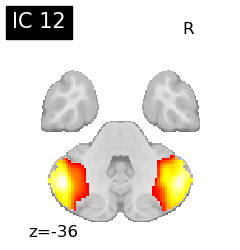

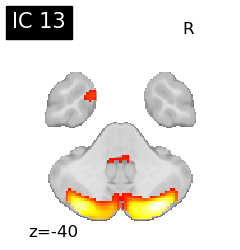

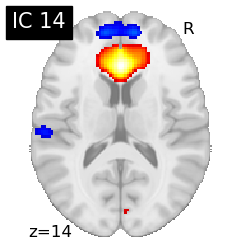

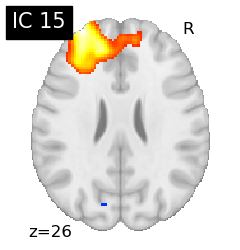

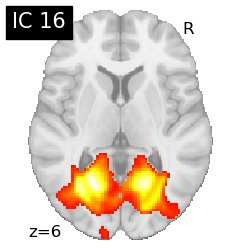

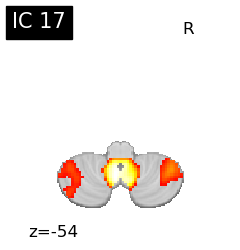

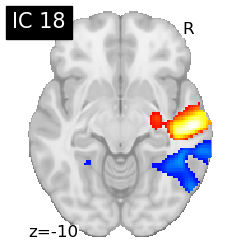

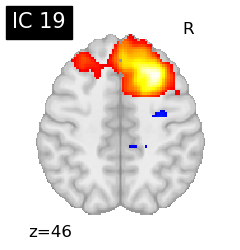

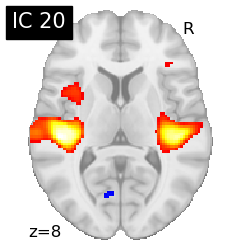

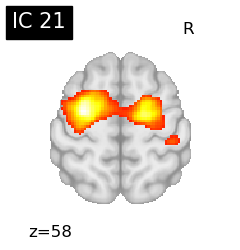

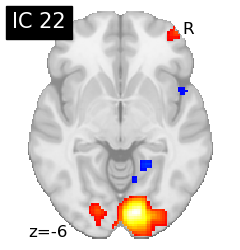

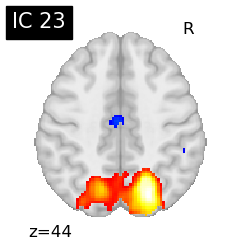

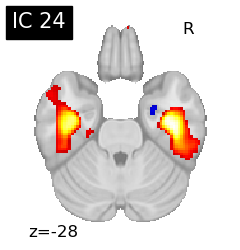

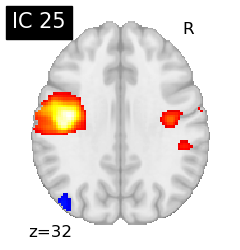

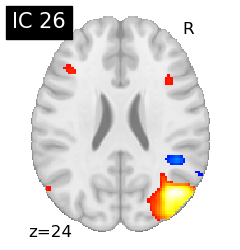

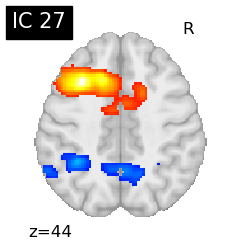

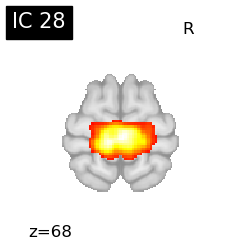

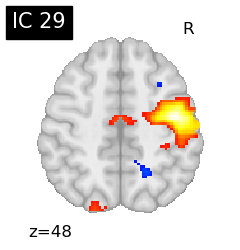

In [14]:
ica_module.plot_ICA_components(ICs_whole_original)

In [5]:
List_of_masks = []
path = pathlib.Path("/data/origami/niusha/code/local-experiment/io/whole_original_data/PD/masks/")
for i in range(30):
    List_of_masks.append(load_img(path / f"IC_PD_{i}.nii.gz"))

masks = concat_imgs(List_of_masks)

/data/origami/niusha/miniconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize,


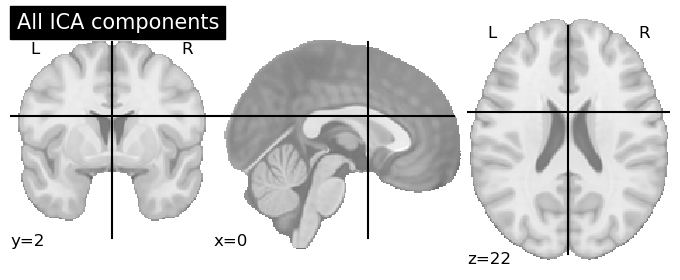

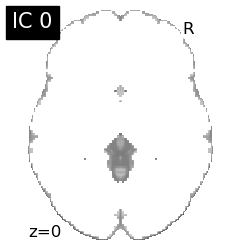

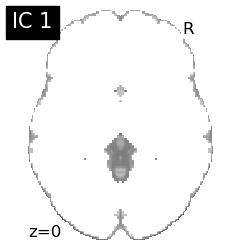

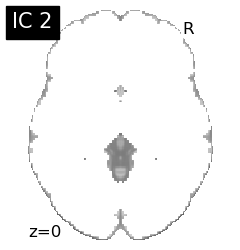

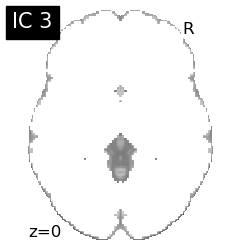

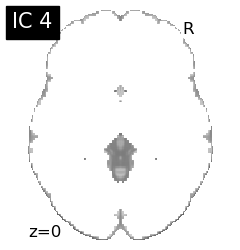

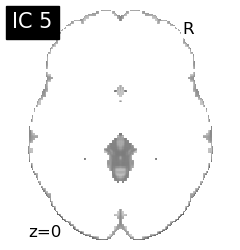

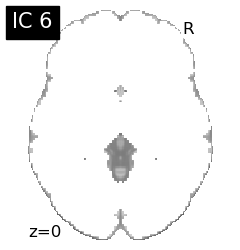

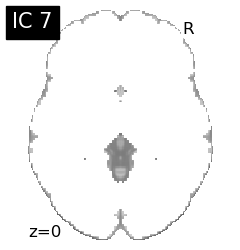

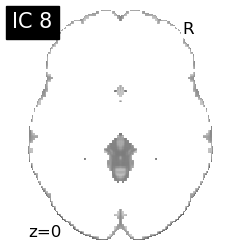

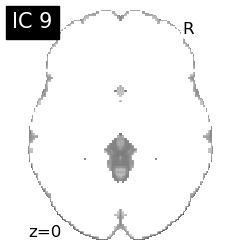

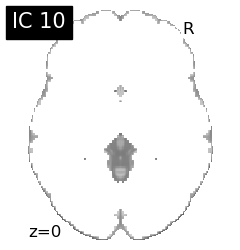

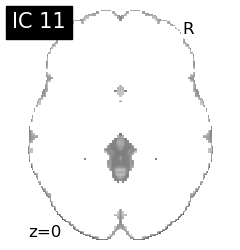

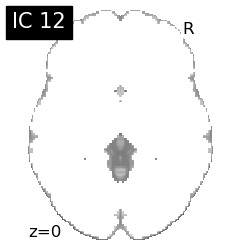

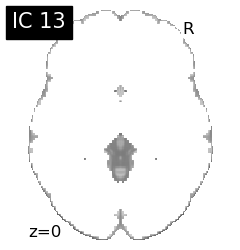

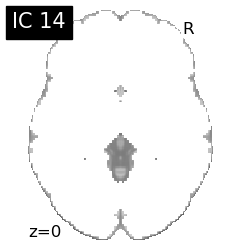

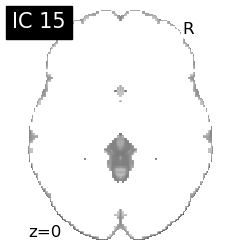

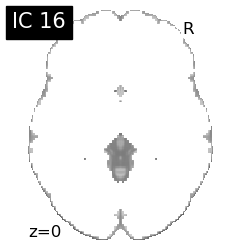

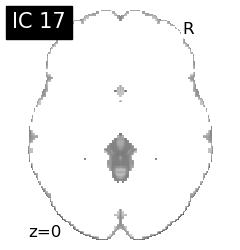

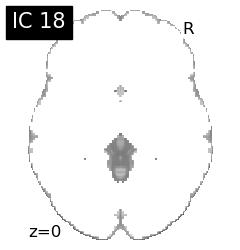

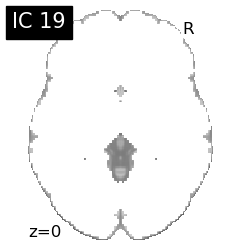

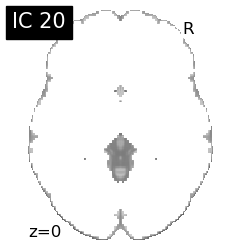

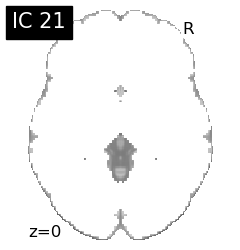

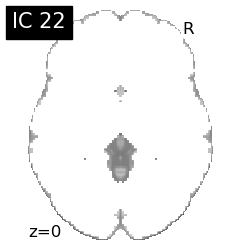

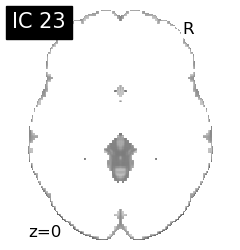

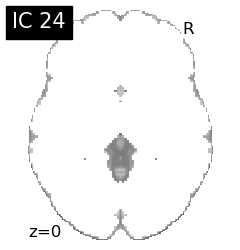

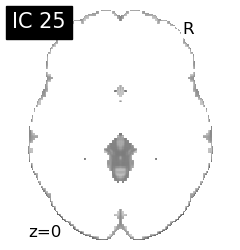

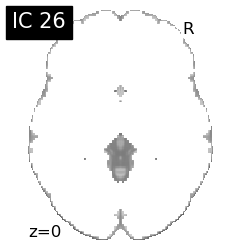

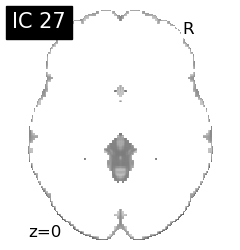

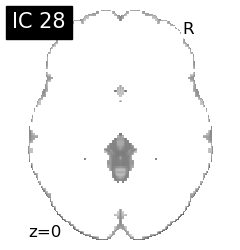

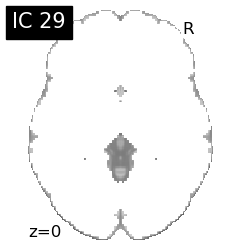

In [9]:
ica_module.plot_ICA_components(masks)

/data/origami/niusha/miniconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize,


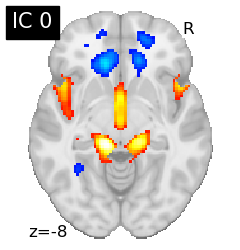

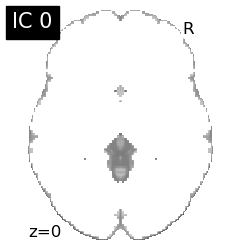

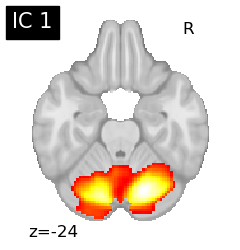

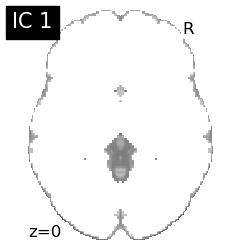

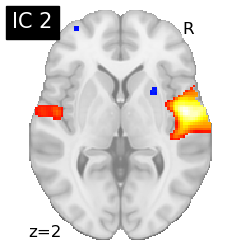

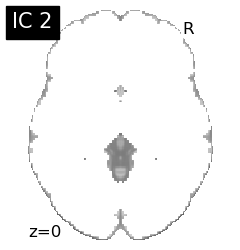

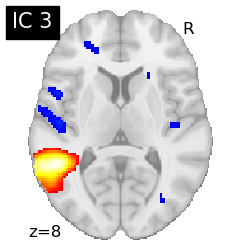

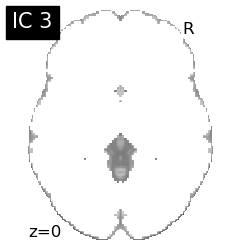

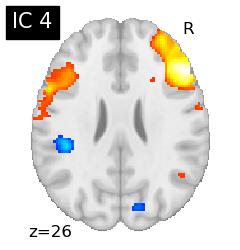

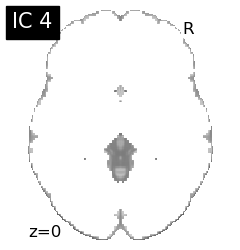

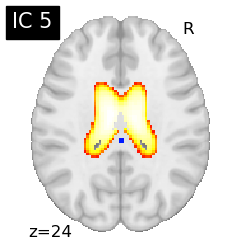

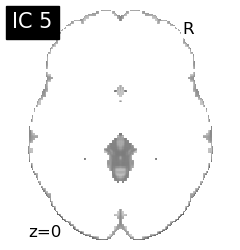

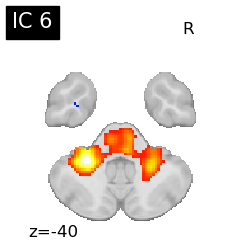

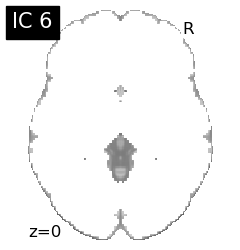

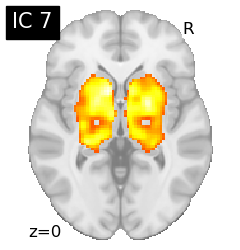

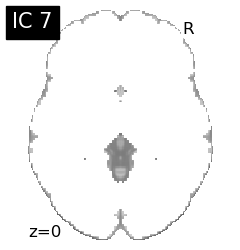

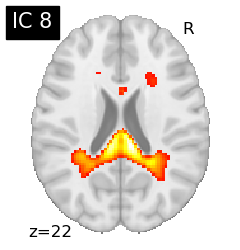

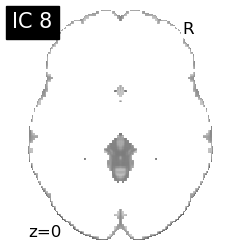

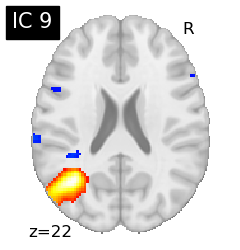

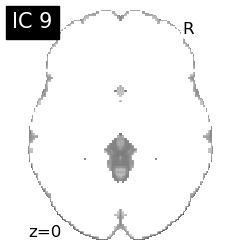

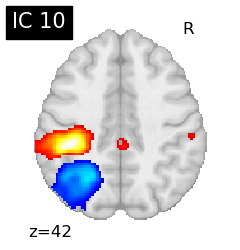

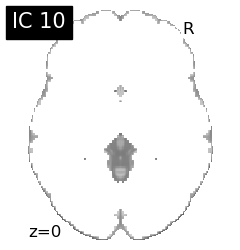

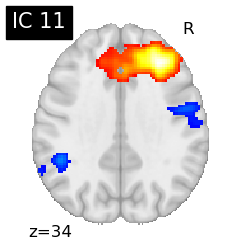

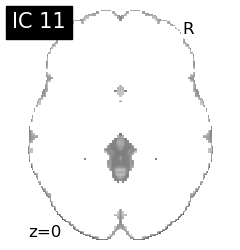

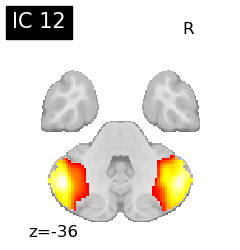

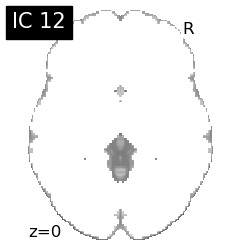

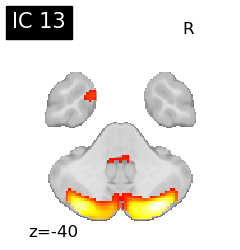

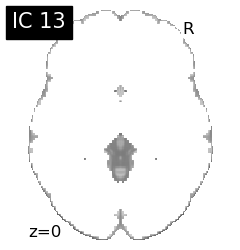

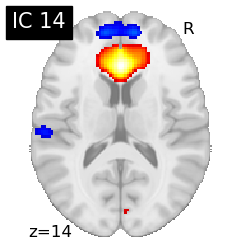

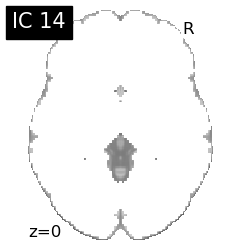

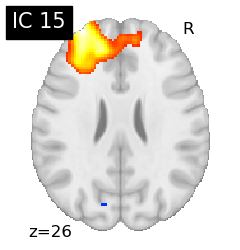

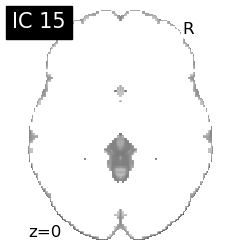

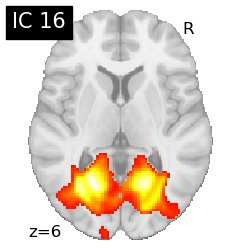

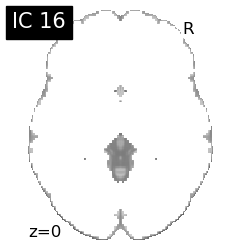

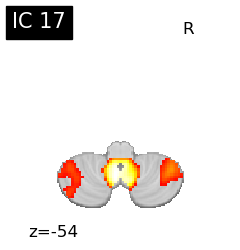

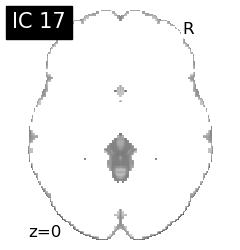

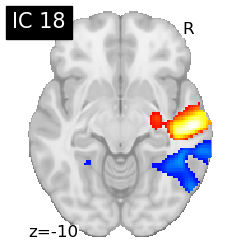

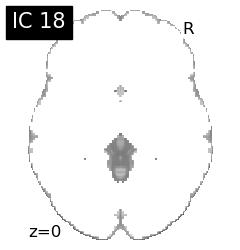

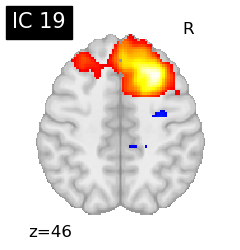

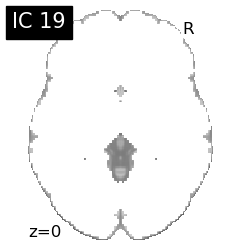

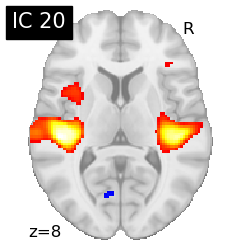

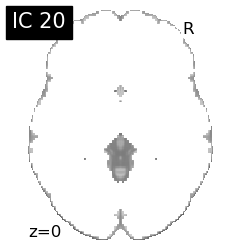

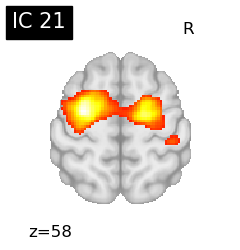

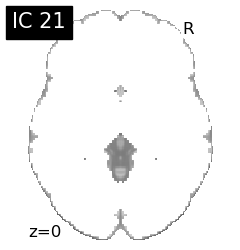

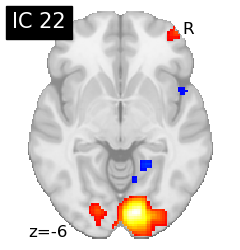

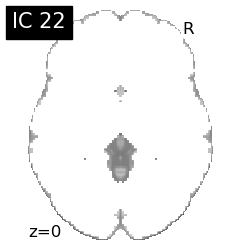

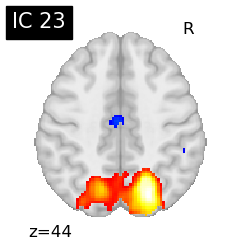

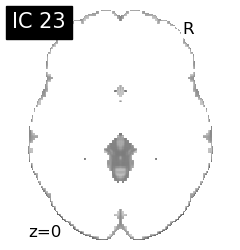

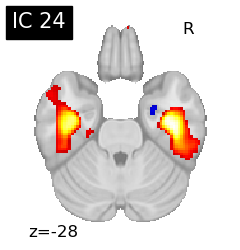

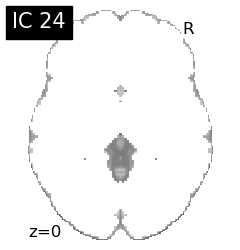

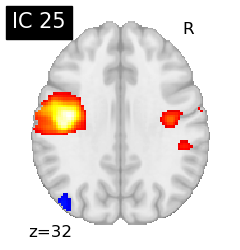

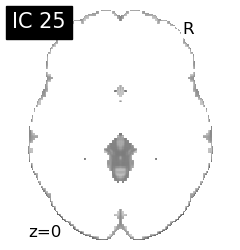

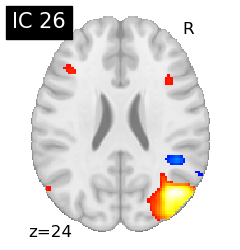

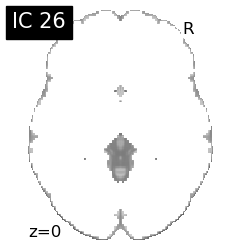

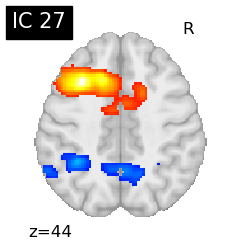

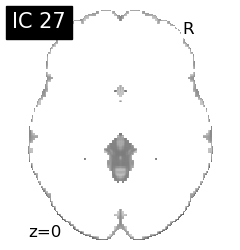

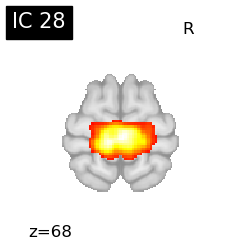

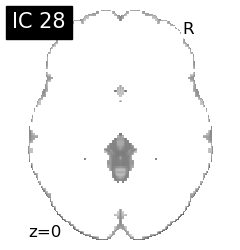

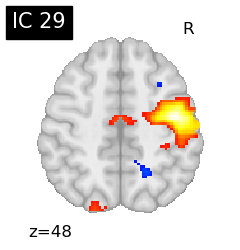

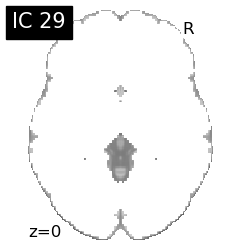

In [26]:
from nilearn import masking
from nilearn.image import iter_img
from nilearn.masking import apply_mask
from nilearn.image import binarize_img

new_masks_list = []
for i, cur_ic in enumerate(iter_img(ICs_whole_original)):
    plot_stat_map(cur_ic, display_mode="z", title="IC %d" %i,
        cut_coords=1, colorbar=False)

    mask = masking.compute_brain_mask(
        target_img=cur_ic,
        mask_type='whole-brain',
        )
    plot_stat_map(mask, display_mode="z", title="IC %d" %i,
        cut_coords=1, colorbar=False)  

    new_masks_list.append(mask)    

In [22]:
new_masks = concat_imgs(new_masks_list)

/data/origami/niusha/miniconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize,


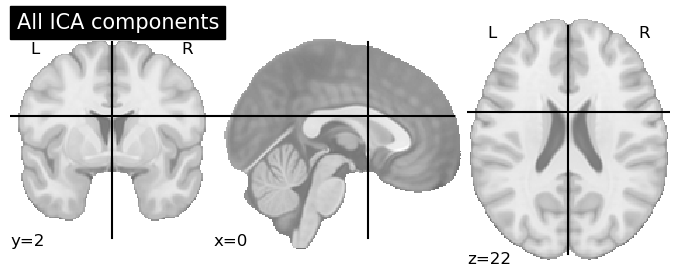

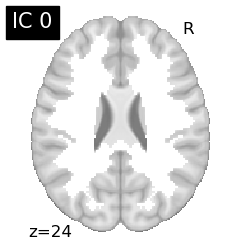

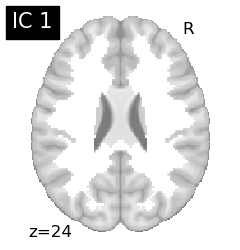

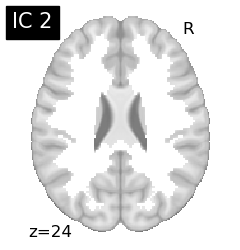

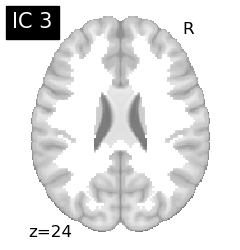

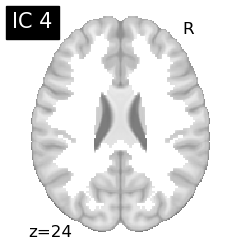

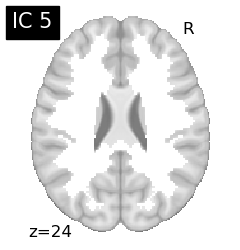

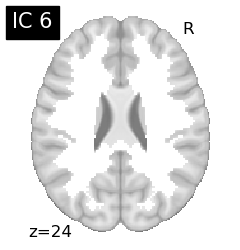

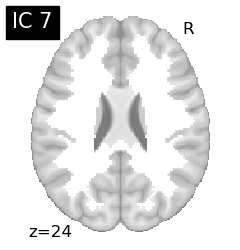

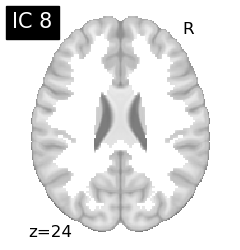

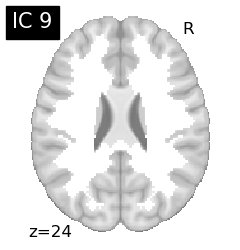

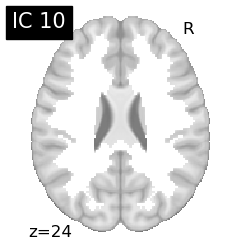

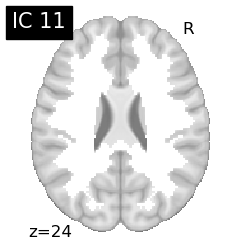

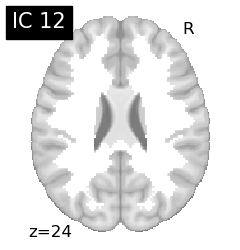

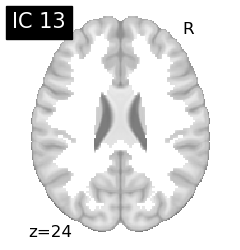

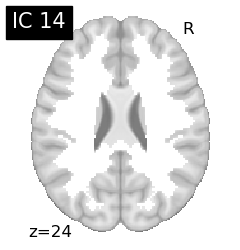

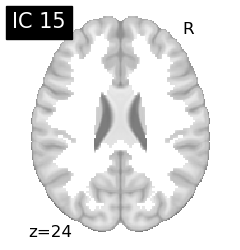

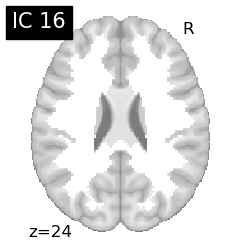

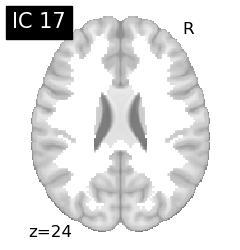

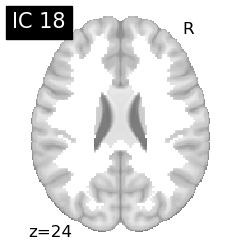

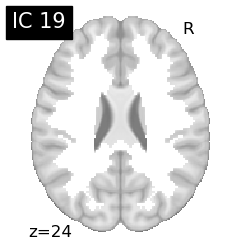

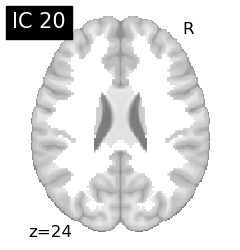

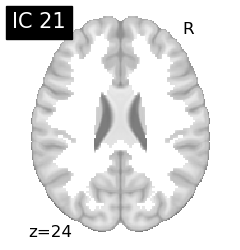

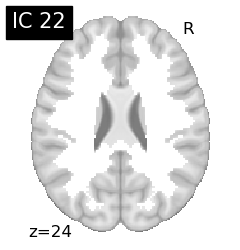

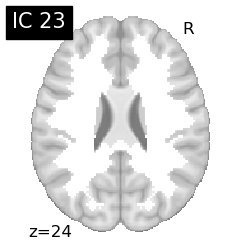

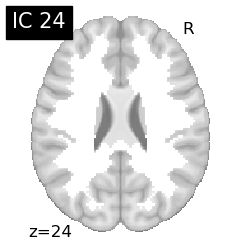

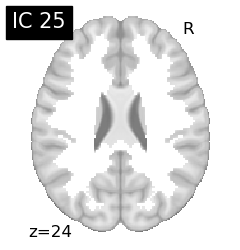

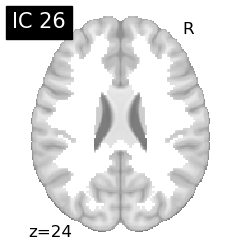

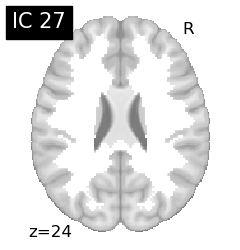

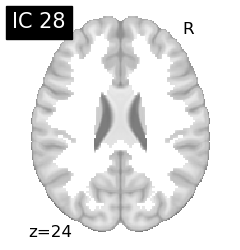

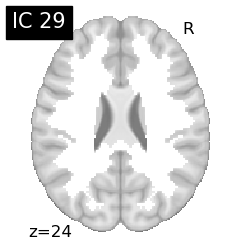

In [23]:
ica_module.plot_ICA_components(new_masks_list)